In [43]:
import pandas as pd

data = pd.read_csv("dropout-contest-jan-8.csv")
data = data.drop(['Timestamp', 'Email Address', 'Do you wish to include any thoughts or explanations for your predictions?'], axis=1)
    
data.columns = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 'participant', 'twitter', 'privacyPreference', 'alias', 'showAnswers']

In [ ]:
data['delete'] = 0
    
for row in range(0,len(data)):
    candidates = []
    for column in data.columns[:-6]:
        if data[column][row] not in candidates:
            candidates.append(data[column][row])
    if len(set(candidates)) != 14: # count number of candidates in survey response. Anything less indicates a mistake.
        data['delete'][row] = 1
        
data = data[data['delete']==0]
del data['delete']

data = data.reset_index()
del data['index']

In [50]:
# this reformatted data will be necessary for answering certain questions
reformattedData = {'participant':[]}

for row in range(0,len(data)):
    for column in data.columns[:-4]:
        if column == 'participant':
            reformattedData['participant'].append(data[column][row])
        elif data[column][row] not in reformattedData:
            reformattedData[data[column][row]] = [int(column)]
        elif data[column][row] in reformattedData:
            reformattedData[data[column][row]].append(int(column))
            
reformattedData = pd.DataFrame(reformattedData)

In [71]:
rankSpots = list(data.columns[:14])
candidates = list(reformattedData.keys()[1:])

In [87]:
def candidateCountsForRank(rankSpot):
    candidateCounts = {}

    for row in range(0,len(data)):
        if data[rankSpot][row] in candidateCounts:
            candidateCounts[data[rankSpot][row]] = candidateCounts[data[rankSpot][row]] + 1
        else:
            candidateCounts[data[rankSpot][row]] = 1

    for candidate in candidates:
        if candidate not in candidateCounts:
            candidateCounts[candidate] = 0
            
    return candidateCounts

In [95]:
listOfDictionaries = []

for rank in rankSpots:
    listOfDictionaries.append(candidateCountsForRank(rank))

In [122]:
heatmapData = pd.DataFrame(listOfDictionaries, index=rankSpots)

heatmapData = heatmapData.transpose()

heatmapData['sort'] = [8, 9, 12, 5, 2, 13, 14, 3, 4, 1, 10, 11, 6, 7]

heatmapData = heatmapData.sort_values('sort', ascending = False)
del heatmapData['sort']

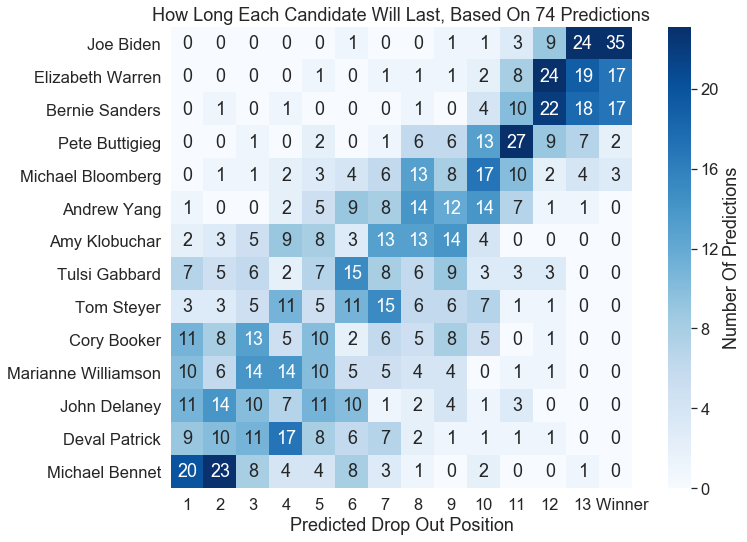

In [292]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})

sns.set(font_scale=1.5)
ax = sns.heatmap(heatmapData, cmap="Blues", square = True, robust = True, cbar_kws={'label': 'Number Of Predictions'}, annot=True)

fig = ax.get_figure()
fig.tight_layout(pad=2.5)

ax.set(title="How Long Each Candidate Will Last, Based On 74 Predictions")
ax.set(xlabel='Predicted Drop Out Position')
ax.set(xticklabels=[1,2,3,4,5,6,7,8,9,10,11,12,13,"   Winner"])

fig.savefig(r"C:\Users\glol7001\Pictures\heatmapFinalWithNumbers.png") 